In [23]:
import tensorflow as tf
from xorlayer import XORLayer
import numpy as np

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [24]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [25]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(XORLayer(50))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

weightsA = model.layers[1].get_weights()[0].flatten()
weightsB = model.layers[1].get_weights()[1].flatten()

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30, verbose=1, use_multiprocessing=False, validation_data=(x_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2750 - accuracy: 0.9229 - val_loss: 0.1694 - val_accuracy: 0.9521
Epoch 2/30
1875/1875 [==============================] - 2s 986us/step - loss: 0.1509 - accuracy: 0.9601 - val_loss: 0.2149 - val_accuracy: 0.9516
Epoch 3/30
1875/1875 [==============================] - 2s 947us/step - loss: 0.1287 - accuracy: 0.9673 - val_loss: 0.1887 - val_accuracy: 0.9581
Epoch 4/30
1875/1875 [==============================] - 2s 909us/step - loss: 0.0929 - accuracy: 0.9748 - val_loss: 0.1549 - val_accuracy: 0.9636
Epoch 5/30
1875/1875 [==============================] - 2s 952us/step - loss: 0.1046 - accuracy: 0.9747 - val_loss: 0.1875 - val_accuracy: 0.9607
Epoch 6/30
1875/1875 [==============================] - 2s 948us/step - loss: 0.0757 - accuracy: 0.9801 - val_loss: 0.2450 - val_accuracy: 0.9570
Epoch 7/30
1875/1875 [==============================] - 2s 935us/step - loss: 0.0975 - accuracy: 0.9776 - val_loss: 0.2372 - v

The idea is that the best weight initilization is one that mirrors the distribution of the 'target' weights.
Since when initializing weights in a NN, we sample a distribution for each weight, we don't need to do multiple final weight samples because each weight is in itself a sample.
Which asks a different question, is there a better way to initialize weights that is not sampling a distribution for each individual weight but for an 'ensemble.'
But what ever!

In [27]:
weightsA = model.layers[1].get_weights()[0].flatten()
weightsB = model.layers[1].get_weights()[1].flatten()
allWeights = np.concatenate([weightsB, weightsA])

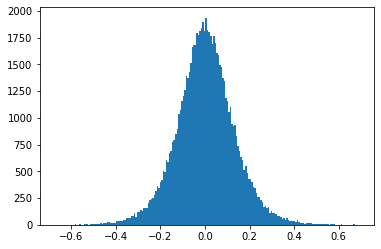

In [28]:
import matplotlib.pyplot as plt
NBINS = 201
plt.hist(allWeights, bins=NBINS)
plt.show()

Looks normal, so I will find STDdev and mean

In [29]:
_stddev = np.std(allWeights)
_mean = np.mean(allWeights)

In [30]:
print("mean: " + str(_mean))
print("stddev: " + str(_stddev))

mean: 0.002725486
stddev: 0.13055477


In [31]:
np.sqrt(2/(28**2))

0.050507627227610534

In [32]:
np.sqrt(1/50)

0.1414213562373095

In [33]:
1/50

0.02